# Compare the calculated radial matrix elements to pairinteraction and ARC

In [1]:
import logging
import os

import matplotlib.pyplot as plt
import numpy as np

from numerov.matrix_elements import radial_matrix_element
from numerov.rydberg import RydbergState
from numerov.units import ureg

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")
logging.getLogger("numerov").setLevel(logging.WARNING)

In [2]:
# A few exemplary test cases, where pairinteraction and ARC do fail in various ways
dn, dl, dj, dm = (3, 1, 0, 0)
# dn, dl, dj, dm = (2, 0, 0, 0)
# dn, dl, dj, dm = (2, 2, 2, 0)
# dn, dl, dj, dm = (5, 1, 0, 0)
# dn, dl, dj, dm = (5, 2, 1, 0)
# qn_list: (n, l, j, mj)

qn1_list = np.array([(n1, n1 - 1, n1 - 0.5, n1 - 0.5) for n1 in range(20, 150)])
qn2_list = np.array([(n + dn, l + dl, j + dj, m + dm) for n, l, j, m in qn1_list])

In [3]:
matrixelements = []
for qn1, qn2 in zip(qn1_list, qn2_list):
    print(f"n={qn1[0]}", end="\r")
    state_i = RydbergState("Rb", qn1[0], qn1[1], qn1[2])
    state_f = RydbergState("Rb", qn2[0], qn2[1], qn2[2])
    state_i.integrate()
    state_f.integrate()
    matrixelements.append(radial_matrix_element(state_i, state_f, 1))

matrixelements = np.array(matrixelements, dtype=float)
matrixelements *= ureg.Quantity(1, "bohr_radius").to("micrometer").magnitude

WARNING rydberg.py: xmin=173.1856 was not chosen good (sum_small_z=0.0012644004109388133), and the wavefunction is positive at the inner boundary, so we could not fix it.


WARNING rydberg.py: xmin=173.7124 was not chosen good (sum_small_z=0.0011279254803178282), and the wavefunction is positive at the inner boundary, so we could not fix it.
WARNING rydberg.py: xmin=193.7664 was not chosen good (sum_small_z=0.0011650690920261468), and the wavefunction is positive at the inner boundary, so we could not fix it.
WARNING rydberg.py: xmin=193.21 was not chosen good (sum_small_z=0.001023247793720388), and the wavefunction is positive at the inner boundary, so we could not fix it.
WARNING rydberg.py: xmin=215.5024 was not chosen good (sum_small_z=0.0010422427354885636), and the wavefunction is positive at the inner boundary, so we could not fix it.


In [4]:
matrixelements_hydrogen = []
for qn1, qn2 in zip(qn1_list, qn2_list):
    print(f"n={qn1[0]}", end="\r")
    state_i = RydbergState("H", qn1[0], qn1[1], qn1[2])
    state_i.create_model(add_spin_orbit=False)
    state_f = RydbergState("H", qn2[0], qn2[1], qn2[2])
    state_f.create_model(add_spin_orbit=False)
    state_i.integrate()
    state_f.integrate()
    matrixelements_hydrogen.append(radial_matrix_element(state_i, state_f, 1))

matrixelements_hydrogen = np.array(matrixelements_hydrogen, dtype=float)
matrixelements_hydrogen *= ureg.Quantity(1, "bohr_radius").to("micrometer").magnitude

WARNING rydberg.py: xmin=173.1856 was not chosen good (sum_small_z=0.0012856438869247415), and the wavefunction is positive at the inner boundary, so we could not fix it.
WARNING rydberg.py: xmin=173.7124 was not chosen good (sum_small_z=0.0011424566800356836), and the wavefunction is positive at the inner boundary, so we could not fix it.
WARNING rydberg.py: xmin=193.7664 was not chosen good (sum_small_z=0.0011832427348541026), and the wavefunction is positive at the inner boundary, so we could not fix it.
WARNING rydberg.py: xmin=193.21 was not chosen good (sum_small_z=0.0010361382391430591), and the wavefunction is positive at the inner boundary, so we could not fix it.
WARNING rydberg.py: xmin=215.5024 was not chosen good (sum_small_z=0.0010578587766983105), and the wavefunction is positive at the inner boundary, so we could not fix it.


In [5]:
from pairinteraction import pireal as pi

os.makedirs("./.pairinteraction_cache/", exist_ok=True)
cache = pi.MatrixElementCache("./.pairinteraction_cache/")
cache.setMethod(pi.NUMEROV)

matrixelements_pi_numerov = []
for qn1, qn2 in zip(qn1_list, qn2_list):
    print(f"n={qn1[0]}", end="\r")
    state_i = pi.StateOne("Rb", int(qn1[0]), int(qn1[1]), qn1[2], qn1[3])
    state_f = pi.StateOne("Rb", int(qn2[0]), int(qn2[1]), qn2[2], qn2[3])
    matrixelements_pi_numerov.append(cache.getRadial(state_f, state_i, 1))

matrixelements_pi_numerov = np.array(matrixelements_pi_numerov, dtype=float)

cache.setMethod(pi.WHITTAKER)

matrixelements_pi_whittaker = []
for qn1, qn2 in zip(qn1_list, qn2_list):
    print(f"n={qn1[0]}", end="\r")
    state_i = pi.StateOne("Rb", int(qn1[0]), int(qn1[1]), qn1[2], qn1[3])
    state_f = pi.StateOne("Rb", int(qn2[0]), int(qn2[1]), qn2[2], qn2[3])
    matrixelements_pi_whittaker.append(cache.getRadial(state_f, state_i, 1))

matrixelements_pi_whittaker = np.array(matrixelements_pi_whittaker, dtype=float)

In [6]:
import arc

atom = arc.Rubidium87()

matrixelements_arc = []
for qn1, qn2 in zip(qn1_list, qn2_list):
    print(f"n={qn1[0]}", end="\r")
    v = atom.getRadialMatrixElement(int(qn1[0]), int(qn1[1]), qn1[2], int(qn2[0]), int(qn2[1]), qn2[2])
    matrixelements_arc.append(v)

matrixelements_arc = np.array(matrixelements_arc, dtype=float)
matrixelements_arc *= ureg.Quantity(1, "bohr_radius").to("micrometer").magnitude

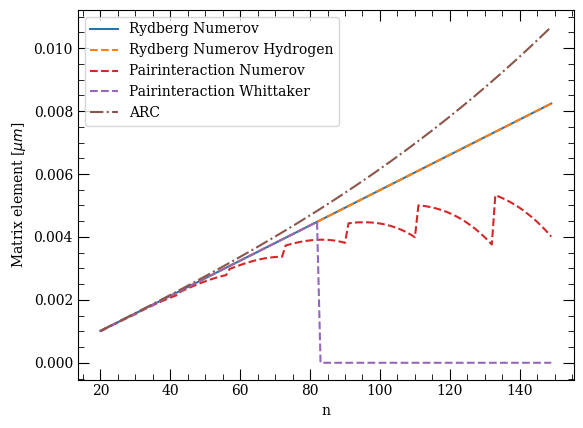

In [7]:
n_list = qn1_list[:, 0]

fig, ax = plt.subplots()
ax.plot(n_list, matrixelements, "C0-", label="Rydberg Numerov")
ax.plot(n_list, matrixelements, "C1--", label="Rydberg Numerov Hydrogen")
ax.plot(n_list, matrixelements_pi_numerov, "C3--", label="Pairinteraction Numerov")
ax.plot(n_list, matrixelements_pi_whittaker, "C4--", label="Pairinteraction Whittaker")
ax.plot(n_list, matrixelements_arc, "C5-.", label="ARC")
ax.set_xlabel("n")
ax.set_ylabel(r"Matrix element [$\mu m$]")
ax.legend()
plt.show()